In [50]:
import pandas as pd
df = pd.read_csv("./matches.csv")
# df1 = df[df.season!=2019]
df1 = df[(df.team1=="Mumbai Indians") | (df.team2=="Mumbai Indians") ]

In [51]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [52]:
df1.isnull().sum()

id                   0
season               0
city                 3
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            157
dtype: int64

In [53]:
df1[df1.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [54]:
df1['city'].fillna('UAE',inplace=True)

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [55]:
df1.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            157
dtype: int64

In [56]:
def convert_to_number(input):
    res={}
    j=0
    for i in input:
        if i not in res.keys():
            j+=1
            res[i] = j
    return res

In [57]:
team_vector = convert_to_number(df1.team1.append(df1.team2))
toss_result_vector = convert_to_number(df1.toss_decision)
match_result_vector = convert_to_number(df1.result)
city_vector=convert_to_number(df1.city)
stadium_vector =convert_to_number(df1.venue)

In [58]:
team_vector
toss_result_vector
match_result_vector
stadium_vector
city_vector

{'Pune': 1,
 'Mumbai': 2,
 'Bangalore': 3,
 'Indore': 4,
 'Rajkot': 5,
 'Delhi': 6,
 'Hyderabad': 7,
 'Kolkata': 8,
 'Chennai': 9,
 'Chandigarh': 10,
 'Jaipur': 11,
 'Cape Town': 12,
 'Durban': 13,
 'Port Elizabeth': 14,
 'East London': 15,
 'Johannesburg': 16,
 'Centurion': 17,
 'Visakhapatnam': 18,
 'Dharamsala': 19,
 'Abu Dhabi': 20,
 'UAE': 21,
 'Sharjah': 22,
 'Cuttack': 23,
 'Ahmedabad': 24,
 'Kanpur': 25,
 'Bengaluru': 26,
 'Mohali': 27}

In [59]:
team_vector

{'Mumbai Indians': 1,
 'Kolkata Knight Riders': 2,
 'Sunrisers Hyderabad': 3,
 'Royal Challengers Bangalore': 4,
 'Gujarat Lions': 5,
 'Kings XI Punjab': 6,
 'Rising Pune Supergiant': 7,
 'Chennai Super Kings': 8,
 'Rajasthan Royals': 9,
 'Deccan Chargers': 10,
 'Delhi Daredevils': 11,
 'Pune Warriors': 12,
 'Rising Pune Supergiants': 13,
 'Delhi Capitals': 14,
 'Kochi Tuskers Kerala': 15}

In [60]:
df1['team1'] = df1['team1'].apply(lambda x:team_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df1['team2'] = df1['team2'].apply(lambda x:team_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df1['toss_decision'] = df1['toss_decision'].apply(lambda x:toss_result_vector[x])
df1['winner'] = df1['winner'].apply(lambda x:team_vector[x])
df1['result'] = df1['result'].apply(lambda x:match_result_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [63]:
df1['toss_winner'] = df1['toss_winner'].apply(lambda x:team_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df1['city'] = df1['city'].apply(lambda x:city_vector[x])
df1['venue'] = df1['venue'].apply(lambda x:stadium_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,1,2017-04-06,1,7,7,1,1,0,7,0,7,SPD Smith,1,A Nand Kishore,S Ravi,NaN
6,7,2017,2,2017-04-09,2,1,1,1,1,0,1,0,4,N Rana,2,Nitin Menon,CK Nandan,NaN
9,10,2017,2,2017-04-12,3,1,1,1,1,0,1,0,4,JJ Bumrah,2,Nitin Menon,CK Nandan,NaN
11,12,2017,3,2017-04-14,4,1,1,1,1,0,1,0,4,KA Pollard,3,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,2,2017-04-16,5,1,1,1,1,0,1,0,6,N Rana,2,A Nand Kishore,S Ravi,NaN


In [66]:
def convert_to_number_based_on_count(input):
    res={}
    for i in input:
        if i not in res.keys():
            res[i] = 1
        else:
            res[i]+=1
    return res

In [67]:
pom_count=convert_to_number_based_on_count(df1.player_of_match)
pom_vector=convert_to_number(df1.player_of_match)

In [68]:
df1['player_of_match'] = df1['player_of_match'].apply(lambda x:pom_vector[x])

/Users/a6049244/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,1,2017-04-06,1,7,7,1,1,0,7,0,7,1,1,A Nand Kishore,S Ravi,NaN
6,7,2017,2,2017-04-09,2,1,1,1,1,0,1,0,4,2,2,Nitin Menon,CK Nandan,NaN
9,10,2017,2,2017-04-12,3,1,1,1,1,0,1,0,4,3,2,Nitin Menon,CK Nandan,NaN
11,12,2017,3,2017-04-14,4,1,1,1,1,0,1,0,4,4,3,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,2,2017-04-16,5,1,1,1,1,0,1,0,6,2,2,A Nand Kishore,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,11338,2019,8,28/04/19,2,1,1,1,1,0,2,34,0,85,8,Ian Gould,Nitin Menon,Anil Dandekar
746,11342,2019,2,02/05/19,1,3,1,2,2,0,1,0,0,3,2,S Ravi,O Nandan,Nanda Kishore
751,11347,2019,2,05/05/19,2,1,1,1,1,0,1,0,9,70,2,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,9,07/05/19,8,1,8,2,1,0,1,0,6,80,34,Nigel Llong,Nitin Menon,Ian Gould


In [70]:
df_work = df1.drop(['id','season','date', 'umpire1','umpire2','umpire3'], axis = 1)

In [71]:
df_work.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
1,1,1,7,7,1,1,0,7,0,7,1,1
6,2,2,1,1,1,1,0,1,0,4,2,2
9,2,3,1,1,1,1,0,1,0,4,3,2
11,3,4,1,1,1,1,0,1,0,4,4,3
15,2,5,1,1,1,1,0,1,0,6,2,2


In [72]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 1 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   city             187 non-null    int64
 1   team1            187 non-null    int64
 2   team2            187 non-null    int64
 3   toss_winner      187 non-null    int64
 4   toss_decision    187 non-null    int64
 5   result           187 non-null    int64
 6   dl_applied       187 non-null    int64
 7   winner           187 non-null    int64
 8   win_by_runs      187 non-null    int64
 9   win_by_wickets   187 non-null    int64
 10  player_of_match  187 non-null    int64
 11  venue            187 non-null    int64
dtypes: int64(12)
memory usage: 19.0 KB


In [73]:
df_work.shape

(187, 12)

In [74]:
df_work.describe()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.0,187.000000,187.000000,187.000000,187.000000,187.000000
mean,6.625668,3.427807,4.368984,4.000000,1.406417,1.010695,0.0,3.572193,15.368984,3.117647,33.518717,8.914439
std,6.262964,3.423335,3.961875,3.874371,0.492483,0.103139,0.0,3.685029,24.308008,3.421478,24.287114,8.408467
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,10.000000,2.000000
50%,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,30.000000,6.000000
75%,9.000000,6.000000,8.000000,8.000000,2.000000,1.000000,0.0,6.000000,25.000000,6.000000,52.000000,12.000000
max,27.000000,14.000000,15.000000,15.000000,2.000000,2.000000,0.0,15.000000,146.000000,10.000000,85.000000,34.000000


In [75]:
train_df_x, train_df_y = df_work, df_work.winner
train_df_x.drop('winner',axis=1,inplace=True)

In [76]:
train_df_x.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue
1,1,1,7,7,1,1,0,0,7,1,1
6,2,2,1,1,1,1,0,0,4,2,2
9,2,3,1,1,1,1,0,0,4,3,2
11,3,4,1,1,1,1,0,0,4,4,3
15,2,5,1,1,1,1,0,0,6,2,2


In [77]:
train_df_x['match_result'] = train_df_y

In [78]:
train_df_x.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,match_result
1,1,1,7,7,1,1,0,0,7,1,1,7
6,2,2,1,1,1,1,0,0,4,2,2,1
9,2,3,1,1,1,1,0,0,4,3,2,1
11,3,4,1,1,1,1,0,0,4,4,3,1
15,2,5,1,1,1,1,0,0,6,2,2,1


In [79]:
values= train_df_x.values

In [80]:
values

array([[ 1,  1,  7, ...,  1,  1,  7],
       [ 2,  2,  1, ...,  2,  2,  1],
       [ 2,  3,  1, ...,  3,  2,  1],
       ...,
       [ 2,  2,  1, ..., 70,  2,  1],
       [ 9,  8,  1, ..., 80, 34,  1],
       [ 7,  1,  8, ...,  3, 32,  1]])

In [81]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [82]:
# from sklearn.preprocessing import MinMaxScaler
# scaler_x = MinMaxScaler(feature_range=(0, 1))
# scaled_x = scaler_x.fit_transform(values)

In [83]:
reframed = series_to_supervised(values, 1, 1)
reframed.drop(reframed.columns[[12,13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)

In [84]:
scaled = reframed.values

In [85]:
n_train_time = 170
train = scaled[:170, :]
test = scaled[170:, :]

In [86]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [87]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [88]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(170, 1, 11) (170,) (16, 1, 11) (16,)


In [89]:
#!pip install sklearn

In [90]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [91]:
#!pip install tensorflow

In [92]:
## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [93]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [94]:
# fit network
history = model.fit(train_X, train_y, epochs=120, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 170 samples, validate on 16 samples
Epoch 1/120
 - 0s - loss: 20.6483 - val_loss: 23.0554
Epoch 2/120
 - 0s - loss: 14.5002 - val_loss: 19.2340
Epoch 3/120
 - 0s - loss: 11.9783 - val_loss: 17.9243
Epoch 4/120
 - 0s - loss: 11.5387 - val_loss: 17.3620
Epoch 5/120
 - 0s - loss: 10.6072 - val_loss: 16.6382
Epoch 6/120
 - 0s - loss: 9.6927 - val_loss: 15.6333
Epoch 7/120
 - 0s - loss: 8.8123 - val_loss: 14.6140
Epoch 8/120
 - 0s - loss: 7.8984 - val_loss: 13.1689
Epoch 9/120
 - 0s - loss: 6.8097 - val_loss: 11.5324
Epoch 10/120
 - 0s - loss: 5.7679 - val_loss: 9.9973
Epoch 11/120
 - 0s - loss: 4.8927 - val_loss: 8.4864
Epoch 12/120
 - 0s - loss: 3.9502 - val_loss: 7.0588
Epoch 13/120
 - 0s - loss: 3.3271 - val_loss: 5.5065
Epoch 14/120
 - 0s - loss: 2.7101 - val_loss: 4.4175
Epoch 15/120
 - 0s - loss: 2.2369 - val_loss: 3.6197
Epoch 16/120
 - 0s - loss: 1.7255 - val_loss: 3.0863
Epoch 17/120
 - 0s - loss: 1.3921 - val_loss: 2.5120
Epoch 18/120
 - 0s - loss: 1.2481 - val_loss: 2.2

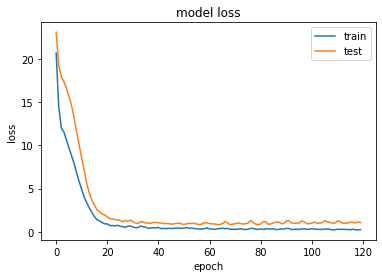

In [95]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [96]:
yhat = model.predict(test_X)

In [97]:
yhat

array([[10.838088  ],
       [11.210492  ],
       [ 2.785433  ],
       [ 5.3322444 ],
       [ 1.4452322 ],
       [ 1.5693402 ],
       [ 1.5464009 ],
       [ 8.476025  ],
       [ 0.83673185],
       [ 0.21909794],
       [ 8.055705  ],
       [ 1.2758958 ],
       [ 2.5024369 ],
       [-0.63573575],
       [ 0.9441245 ],
       [ 0.9766436 ]], dtype=float32)

In [3]:
df2 = pd.read_csv("./deliveries.csv")
df3 = df2[df2.match_id.isin(df1.id)]

In [4]:
df3

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165208,11139,1,Delhi Capitals,Mumbai Indians,1,1,P Shaw,S Dhawan,R Salam,0,...,0,0,1,0,2,1,3,NaN,NaN,NaN
165209,11139,1,Delhi Capitals,Mumbai Indians,1,2,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165210,11139,1,Delhi Capitals,Mumbai Indians,1,3,P Shaw,S Dhawan,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165211,11139,1,Delhi Capitals,Mumbai Indians,1,4,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165212,11139,1,Delhi Capitals,Mumbai Indians,1,5,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
